In [156]:
import numpy as np
import pandas as pd
import keras
import scipy as sp
import sklearn
from sklearn.preprocessing import MinMaxScaler
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [157]:
!pip3 freeze > '/content/drive/MyDrive/Sproj/requirements.txt'

In [119]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [155]:
print(sys.modules.keys())

dict_keys(['sys', 'builtins', '_frozen_importlib', '_imp', '_warnings', '_io', 'marshal', 'posix', '_frozen_importlib_external', '_thread', '_weakref', 'time', 'zipimport', '_codecs', 'codecs', 'encodings.aliases', 'encodings', 'encodings.utf_8', '_signal', '__main__', 'encodings.latin_1', '_abc', 'abc', 'io', 'types', 'enum', '_sre', 'sre_constants', 'sre_parse', 'sre_compile', '_collections_abc', '_operator', 'operator', 'keyword', '_heapq', 'heapq', 'itertools', 'reprlib', '_collections', 'collections', '_functools', 'functools', '_locale', 'copyreg', 're', 'warnings', '_stat', 'stat', 'genericpath', 'posixpath', 'os.path', 'os', '_sitebuiltins', '_bootlocale', 'importlib._bootstrap', 'importlib._bootstrap_external', 'importlib', 'importlib.machinery', 'importlib.abc', 'contextlib', 'importlib.util', 'google', 'google.cloud', 'google.logging', 'mpl_toolkits', 'sphinxcontrib', 'sitecustomize', 'site', '_weakrefset', 'weakref', 'pkgutil', 'runpy', 'ipykernel._version', '__future__', '

In [120]:
df = pd.read_csv('/content/drive/MyDrive/Sproj/ENGRO.csv')

In [121]:
df.head(10)

,Symbol,Date,Open,High,Low,Close,Volume
0,ENGRO,01-Jan-2003,92.95,93.25,88.05,90.40,5021700
1,ENGRO,02-Jan-2003,89.80,93.00,89.80,91.95,7068000
2,ENGRO,03-Jan-2003,93.00,93.75,92.10,92.75,8626200
3,ENGRO,06-Jan-2003,93.00,95.85,92.90,94.70,17249600
4,ENGRO,07-Jan-2003,95.50,96.50,94.50,94.95,11390900
5,ENGRO,08-Jan-2003,95.20,95.40,94.05,94.35,3847700
6,ENGRO,09-Jan-2003,95.00,98.35,94.50,97.40,26095000
7,ENGRO,10-Jan-2003,98.50,99.20,97.25,97.50,13576700
8,ENGRO,13-Jan-2003,98.40,104.00,97.05,102.55,30260000
9,ENGRO,14-Jan-2003,102.50,103.50,99.50,99.75,12682000


In [122]:
high_low = df['High'] - df['Low']
high_prev_close = np.abs(df['High'] - df['Close'].shift())
low_prev_close = np.abs(df['Low'] - df['Close'].shift())
atr_df = pd.concat([high_low,high_prev_close,low_prev_close], axis=1)
atr_df.head(5)



In [125]:
true_range = np.max(atr_df, axis=1)
atr = true_range.rolling(14).mean()


In [126]:
atr.head(20)

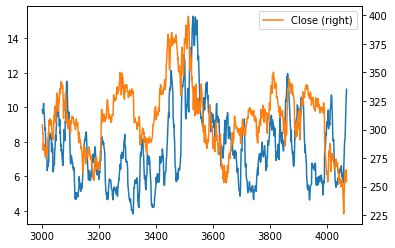

In [128]:
fig, ax = plt.subplots()
atr[3000:].plot(ax=ax)
df['Close'][3000:].plot(ax=ax,secondary_y=True,legend='Close')

In [129]:
atr_df = atr.to_frame(name='ATR')
ndf = pd.concat([df,atr_df],axis=1)
ndf = ndf.dropna()
ndf.head(10)

,Symbol,Date,Open,High,Low,Close,Volume,ATR
13,ENGRO,20-Jan-2003,98.00,99.80,97.00,97.50,3536300,3.232143
14,ENGRO,21-Jan-2003,101.00,102.15,92.65,92.65,10447800,3.539286
15,ENGRO,22-Jan-2003,91.15,92.90,88.05,89.15,6642300,3.657143
16,ENGRO,23-Jan-2003,89.75,91.50,84.70,84.70,5341800,4.014286
17,ENGRO,24-Jan-2003,80.55,89.10,80.50,89.00,9820000,4.407143
18,ENGRO,27-Jan-2003,91.75,94.90,90.00,94.10,10302000,4.685714
19,ENGRO,28-Jan-2003,95.00,96.50,90.00,93.00,19950500,5.053571
20,ENGRO,29-Jan-2003,95.90,96.70,90.00,91.30,15131600,5.246429
21,ENGRO,30-Jan-2003,91.30,94.25,91.00,92.40,8475500,5.339286
22,ENGRO,31-Jan-2003,93.20,93.35,87.80,87.80,4618800,5.239286


In [132]:
all_data_values = ndf.iloc[:, 2: ].values
train_X = all_data_values[:int(all_data_values.shape[0]*0.80), :]
test_X = all_data_values[int(all_data_values.shape[0]*0.80):, :]
print(train_X.shape , test_X.shape)

(3245, 6) (812, 6)


In [133]:
sc = MinMaxScaler(feature_range = (0, 1))
training_scaled = sc.fit_transform(train_X)
testing_scaled = sc.fit_transform(test_X)

In [134]:
X_train = []
y_train = []
for i in range(60, len(training_scaled)-14):
    X_train.append(training_scaled[i-60: i, :])
    y_train.append(training_scaled[i+14, :])
X_train, y_train = np.array(X_train).astype(np.float64), np.array(y_train).astype(np.float64)
print(X_train.shape , y_train.shape)

(3171, 60, 6) (3171, 6)


In [135]:
X_train = X_train.reshape((X_train.shape[0],X_train.shape[1],6)).astype(np.float64)

In [136]:
print(train_X.shape,test_X.shape)
temp = np.vstack((train_X , test_X))
inputs = temp[len(temp)-len(test_X)- 14: ]
inputs = inputs.reshape(-1, 6)
inputs.shape
inputs = sc.transform(inputs)

(3245, 6) (812, 6)


In [137]:
X_test = []
y_test = []
for i in range(60, len(inputs)-14): 
    X_test.append(inputs[i-60: i, :])
    y_test.append(i+14)
    
X_test = np.array(X_test).astype(np.float64)
X_test = X_test.reshape((X_test.shape[0],  X_test.shape[1], 6))


In [138]:
regressor = keras.Sequential()
regressor.add(keras.layers.LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 6)))
regressor.add(keras.layers.Dropout(rate = 0.2))
regressor.add(keras.layers.LSTM(units = 50, return_sequences = True))
regressor.add(keras.layers.Dropout(rate = 0.2))
regressor.add(keras.layers.LSTM(units = 50, return_sequences = True))
regressor.add(keras.layers.Dropout(rate = 0.2))
regressor.add(keras.layers.LSTM(units = 50, return_sequences = True))
regressor.add(keras.layers.Dropout(rate = 0.2))
regressor.add(keras.layers.LSTM(units = 50, return_sequences = False))
regressor.add(keras.layers.Dropout(rate = 0.2))
regressor.add(keras.layers.Dense(units = 6))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [139]:
regressor.fit(x = X_train, y = y_train, batch_size = 32, epochs = 100)

Epoch 1/100
100/100 [==============================] - 23s 145ms/step - loss: 0.0187
Epoch 2/100
100/100 [==============================] - 14s 145ms/step - loss: 0.0111
Epoch 3/100
100/100 [==============================] - 14s 143ms/step - loss: 0.0100
Epoch 4/100
100/100 [==============================] - 18s 179ms/step - loss: 0.0091
Epoch 5/100
100/100 [==============================] - 15s 150ms/step - loss: 0.0086
Epoch 6/100
100/100 [==============================] - 21s 213ms/step - loss: 0.0080
Epoch 7/100
100/100 [==============================] - 15s 147ms/step - loss: 0.0079
Epoch 8/100
100/100 [==============================] - 14s 143ms/step - loss: 0.0075
Epoch 9/100
100/100 [==============================] - 14s 143ms/step - loss: 0.0076
Epoch 10/100
100/100 [==============================] - 14s 143ms/step - loss: 0.0071
Epoch 11/100
100/100 [==============================] - 14s 143ms/step - loss: 0.0068
Epoch 12/100
100/100 [==============================] - 16s 162

KeyboardInterrupt: ignored

In [143]:
regressor.save('/content/drive/MyDrive/Sproj/model/Engro')

In [140]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

24/24 [==============================] - 3s 38ms/step


(752, 6)


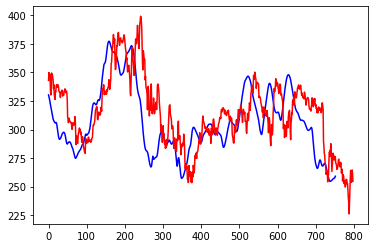

In [145]:
print(predicted_stock_price.shape)
plt.plot(predicted_stock_price[:,3] , color='blue')
plt.plot(test_X[14:,3],color='red')

# plt.title(‘Google price prediction’)
# plt.xlabel(‘Time’)
# plt.ylabel(‘Price’)
# plt.legend()
plt.show()

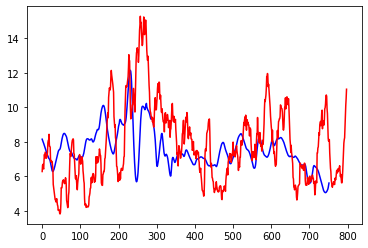

In [142]:
plt.plot(predicted_stock_price[:,-1] , color='blue')
plt.plot(test_X[14:,-1],color='red')


In [152]:
def atr_col(df):
  high_low = df['High'] - df['Low']
  high_prev_close = np.abs(df['High'] - df['Close'].shift())
  low_prev_close = np.abs(df['Low'] - df['Close'].shift())
  atr_df = pd.concat([high_low,high_prev_close,low_prev_close], axis=1)
  true_range = np.max(atr_df, axis=1)
  atr = true_range.rolling(14).mean()
  atr_df = atr.to_frame(name='ATR')
  ndf = pd.concat([df,atr_df],axis=1)
  ndf = ndf.dropna()
  return ndf

  


def predict(model,csv):
  pred_model = keras.models.load_model(model)
  sc = MinMaxScaler(feature_range = (0, 1))
  df = pd.read_csv(csv)
  ndf = atr_col(df)
  pred_X = ndf.iloc[-60:, 2: ].values
  pred_scaled = sc.fit_transform(pred_X)
  pred_scaled=pred_scaled.reshape(1,60,6)
  predicted_stock_price = pred_model.predict(pred_scaled)
  predicted_stock_price = sc.inverse_transform(predicted_stock_price)
  print(predicted_stock_price)
  print(predicted_stock_price.shape)

  Open=predicted_stock_price[:,0][0]
  High=predicted_stock_price[:,1][0]
  Low=predicted_stock_price[:,2][0]
  Close=predicted_stock_price[:,3][0]
  # Volume=predicted_stock_price[:,4][0]
  ATR = predicted_stock_price[:,5][0]
  return Open,High,Low,Close,ATR


Open,High,Low,Close,ATR = predict('/content/drive/MyDrive/Sproj/model/Engro','/content/drive/MyDrive/Sproj/ENGRO.csv')

1/1 [==============================] - 2s 2s/step
[[2.6774768e+02 2.7444052e+02 2.6033875e+02 2.6632394e+02 5.3442344e+05
  8.4960995e+00]]
(1, 6)


In [153]:
print(Open,High,Low,Close,ATR)

267.74768 274.44052 260.33875 266.32394 8.496099
